# Data analysis of StackOverflow Survey 2018


For this project we will be using datasets  provided by Stackoverflow-Survey 2018 on kaggle datasets https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey

**Motivation**

Being a developer and active user of stackoverflow I had few fundamental questions which I will like to get answer from this datasets.

**Objective**

Get answer for following questions:
- When do most of developers wake up?
- How often developers skip meals to be more productive?
- How often developers go for exercise?
- Which is the most popular IDE?
- Which is the most used programming language?

Getting answers for all this will help me improve my lifestyle as a developer and prepare me for upcoming trends in programmers community.

Never thought most of the developers wake up around 7am to 8am, please find many more the interesting insight which I found out from data analysis on my medium blog: https://medium.com/@ks.barodiyakaushik/insights-from-stack-overflows-2018-survey-1b4c37b63ff8

# Data Gathering

For this analysis we will consider only **survey_results_public.csv**

In [35]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [36]:
# First step is to understand the data and the columns present in the data.
survey = pd.read_csv("./data/survey_results_public.csv", low_memory=False)
# Now let us read the datasets one by one and see the first five rows using the head command.
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


Out of 129 different data columns we will be using few of them:
- LanguageWorkedWith
- SkipMeals
- IDE
- Exercise
- WakeTime

# Data analysis

**It's always better to check the data types of different columns and check if there is any missing values before we start data visualization.**

In [37]:
# check the data types of all the columns
survey.dtypes

Respondent                       int64
Hobby                           object
OpenSource                      object
Country                         object
Student                         object
Employment                      object
FormalEducation                 object
UndergradMajor                  object
CompanySize                     object
DevType                         object
YearsCoding                     object
YearsCodingProf                 object
JobSatisfaction                 object
CareerSatisfaction              object
HopeFiveYears                   object
JobSearchStatus                 object
LastNewJob                      object
AssessJob1                     float64
AssessJob2                     float64
AssessJob3                     float64
AssessJob4                     float64
AssessJob5                     float64
AssessJob6                     float64
AssessJob7                     float64
AssessJob8                     float64
AssessJob9               

In [38]:
# check for missing values
survey.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

# Data cleaning

In [39]:
def drop_columns_with_missing(df,cols):
    """
    df: the input data frame whose missing value rows need to be dropped
    cols: the list of columns on the basis of which the rows need to be dropped
    output: cleaned data frame
    """
    return df.dropna(subset=cols)

In [40]:
# define the list of columns which we want to clean
miss_col_check = ['LanguageWorkedWith','SkipMeals','IDE','Exercise', 'WakeTime']
survey = drop_columns_with_missing(survey, miss_col_check)

As we can see there are no rows with missing values or null value in the dataset, we can start with some data visualization! 

# Data Visualization

Now our data is clean and we are ready for visualization. We will try to get answer for all the questions I have:
- When do most developers wake up?
- What are the most popular development environments?
- What are the most popular programming language?
- How often do developers exercise?
- How often do developers skip meal to be more productive?

**Helper functions which I will be using across the project**

In [41]:
def plot_horizontal_bar_chart(df, col):
    """
    df: the input data frame
    col: column name for y axis in the bar chart
    output: None
    """
    sns.countplot(y = df[col], order = df[col].value_counts().index)
    
    return None

In [42]:
def get_unique_feature(df, col):
    """
    df: the input data frame
    col: column name from which we need to pick data
    output: array of all unique feature value
    """
    feature = []
    
    # each row contains multiple values separated ; delimiter
    for value in survey[col]:
        if value is not None: 
            # split by delimiter ;
            types = value.split(";")
            feature.extend(types)
    
    return feature

In [51]:
def prepare_data_frame(col, features, num):
    """
    col: column name for plot
    features: list of feature values 
    num: how many most common values you want to pick
    output: dataframe with feature and count
    """
    popular_feature = Counter(features).most_common(num)

    feature = [i[0] for i in popular_feature]
    values = [i[1] for i in popular_feature]

    df = pd.DataFrame()
    df[col] = feature
    df['total_count'] = values
    
    return df

**Most Developer WakeUp time**

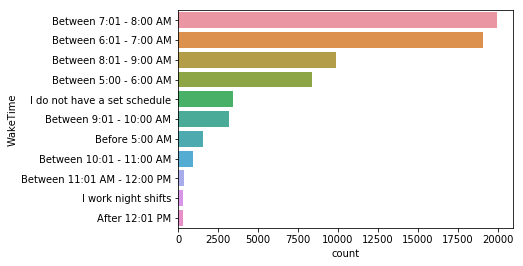

In [44]:
plot_horizontal_bar_chart(survey, 'WakeTime')

**Most Popular Development Environments**

In [52]:
# get all unqiue IDE from survey dataframe
IDE = get_unique_feature(survey, 'IDE')

# prepare data frame of IDE for most common 15 values
df = prepare_data_frame('IDE', IDE, 15)

# get sense of data frame created
df.head()

,IDE,total_count
0,Visual Studio Code,23651
1,Visual Studio,23180
2,Notepad++,22906
3,Sublime Text,19321
4,Vim,17961


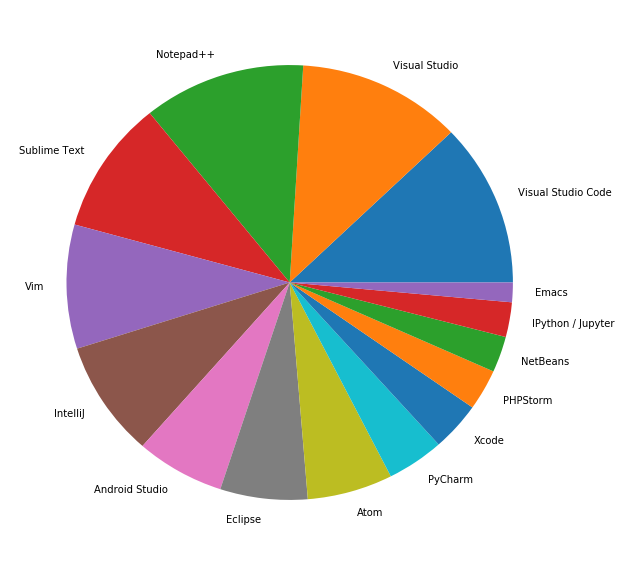

In [53]:
# plot the data using matplotlib 
plt.subplots(figsize=(10,10))

plt.pie(df.total_count,
        labels = df.IDE,
        startangle = 0);

**Most Popular Programming Language**

In [54]:
# get all unqiue languages from survey dataframe
language_worked_with = get_unique_feature(survey, 'LanguageWorkedWith')

# prepare data frame of language worked with
df = prepare_data_frame('Languages', language_worked_with, 15)
        
# let's get sense of data
df.head(5)   

,Languages,total_count
0,JavaScript,47665
1,HTML,46495
2,CSS,44237
3,SQL,39043
4,Java,30533


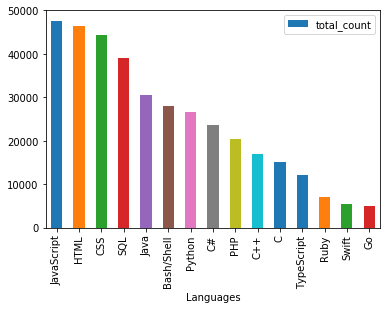

In [55]:
df.plot(x='Languages', y='total_count', kind='Bar');

**How often do Developers exercise.**

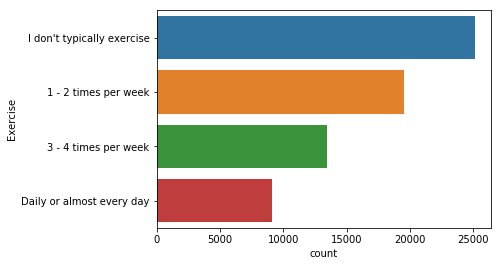

In [49]:
plot_horizontal_bar_chart(survey, 'Exercise')

**How often do Developers skip meal to be more productive.**

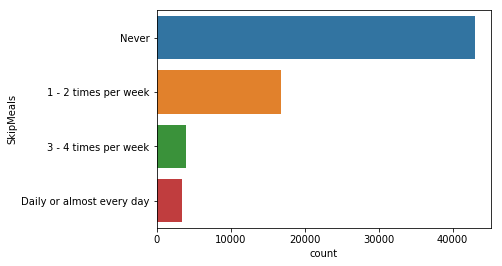

In [50]:
plot_horizontal_bar_chart(survey, 'SkipMeals')

# Key Findings

- Most preferred IDE **Visual Studio Code**.
- Most popular langugae **JavaScript**.
- Most of the developer wake up between **7am - 8am**.
- It's **very rare** where developer skip meals to be more productive.
- Most of the developer **avoid** exercise.